In [1]:
import sys
import os
import subprocess

# Details on CBIS-DDSM
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
import tensorflow as tf
from IPython.display import display
import h5py as hdf



/home/hiba/.virtualenvs/cv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
labels_df = pd.read_csv('data8.csv')
labels_set = set(labels_df)

In [3]:
labels_df.head()

,BI,BII,BIII,BIV,Mass,Calc,Benign,Malign
0,0,0,0,1,1,0,1,0
1,0,0,0,1,1,0,1,0
2,0,0,0,1,1,0,0,1
3,0,0,0,1,1,0,0,1
4,0,0,0,1,1,0,1,0


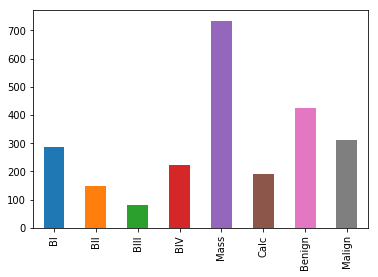

In [4]:
#Labels account
labels_df.sum().plot.bar()

In [5]:
labels_df.sum()

BI        285
BII       147
BIII       81
BIV       221
Mass      734
Calc      189
Benign    424
Malign    310
dtype: int64

,Malign,Benign,Calc,Mass,BIV,BIII,BII,BI
BI,104,181,79,285,0,0,0,285
BII,64,83,39,147,0,0,147,0
BIII,31,50,31,81,0,81,0,0
BIV,111,110,40,221,221,0,0,0
Mass,310,424,189,734,221,81,147,285
Calc,90,99,189,189,40,31,39,79
Benign,0,424,99,424,110,50,83,181
Malign,310,0,90,310,111,31,64,104


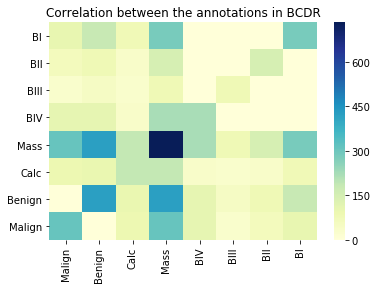

In [6]:
def make_cooccurence_matrix(labels):
    numeric_df = labels; 
    rev_numeric_df= numeric_df [numeric_df.columns[::-1]]
    c_matrix = numeric_df.T.dot(rev_numeric_df)
    ax = plt.axes()
    sns.heatmap(c_matrix, cmap="YlGnBu")
    ax.set_title('Correlation between the annotations in BCDR')
    return c_matrix
    
# Compute the co-ocurrence matrix
make_cooccurence_matrix(labels_df)